<a href="https://colab.research.google.com/github/gplinkage/Data-Science-ML-AI/blob/main/Projects/Predictive_Maintanance_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**#

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#**Loading Data**#

In [118]:
errors= pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_errors.csv')
failures = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_failures.csv')
machines = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_machines.csv')
maint = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_maint.csv')
telemetry = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv')

#**EDA**#

In [119]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [120]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [121]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [122]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [123]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [124]:
# Checking for missiong values

In [125]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [126]:
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [127]:
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [128]:
maint.isna().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [129]:
telemetry.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

**EDA on Errors**

In [130]:
errors.shape

(3919, 3)

In [131]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [132]:
#making sure that there are 100 machines
errors.machineID.value_counts()

22    60
78    54
99    54
49    51
81    51
      ..
19    28
86    27
31    26
6     23
77    22
Name: machineID, Length: 100, dtype: int64

In [133]:
# Converting object to datetime

errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

In [134]:
errors.describe

<bound method NDFrame.describe of                 datetime  machineID errorID
0    2015-01-03 07:00:00          1  error1
1    2015-01-03 20:00:00          1  error3
2    2015-01-04 06:00:00          1  error5
3    2015-01-10 15:00:00          1  error4
4    2015-01-22 10:00:00          1  error4
...                  ...        ...     ...
3914 2015-11-21 08:00:00        100  error2
3915 2015-12-04 02:00:00        100  error1
3916 2015-12-08 06:00:00        100  error2
3917 2015-12-08 06:00:00        100  error3
3918 2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]>

In [135]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [136]:
# counting the number of errors
#error 1 seesm to be the most frequent
errors["errorID"].value_counts()

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

In [137]:
# Checking number of records in errors column
len(errors.index)

3919

In [138]:
errors_with_datetime = errors.assign(
    datetime=pd.to_datetime(errors['datetime'], format='%Y-%m-%d %H:%M:%S'),
    year=errors["datetime"].dt.year,
    month=errors["datetime"].dt.month,
    hours=errors["datetime"].dt.hour
)

In [139]:
#checking the total number of error types per month
error_month = errors_with_datetime.groupby(["month", "errorID"]).size().reset_index(name="monthly_error_count")
error_month

,month,errorID,monthly_error_count
0,1,error1,96
1,1,error2,81
2,1,error3,79
3,1,error4,69
4,1,error5,33
5,2,error1,89
6,2,error2,62
7,2,error3,59
8,2,error4,44
9,2,error5,37


In [140]:
#checking the maximum erorrid per month
max_error_per_month = error_month.groupby('month')['monthly_error_count'].idxmax()
max_errors = error_month.loc[max_error_per_month]
max_errors

,month,errorID,monthly_error_count
0,1,error1,96
5,2,error1,89
10,3,error1,95
15,4,error1,83
21,5,error2,87
25,6,error1,83
31,7,error2,86
36,8,error2,98
40,9,error1,89
46,10,error2,99


Displaying Count of errors

Text(0, 0.5, 'Count')

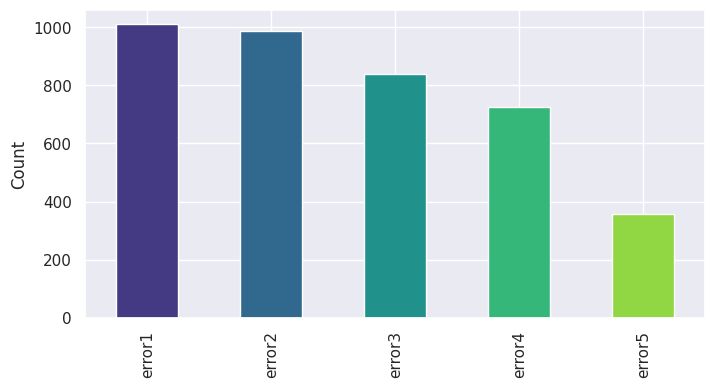

In [141]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

error_counts = errors['errorID'].value_counts()
color_palette = sns.color_palette("viridis", len(error_counts))

errors['errorID'].value_counts().plot(kind='bar', color=color_palette)
plt.ylabel('Count')

Displaying errors per machine

In [142]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

Displaying Count of Errors per Machine

In [143]:
import plotly.express as px
fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()

**EDA on Failures**

In [144]:
# Counting the number of records in failures
len(failures.index)

761

In [145]:
# Checking data type in failures
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [146]:
# Converting object to datetime
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [147]:
failures.describe

<bound method NDFrame.describe of                datetime  machineID failure
0   2015-01-05 06:00:00          1   comp4
1   2015-03-06 06:00:00          1   comp1
2   2015-04-20 06:00:00          1   comp2
3   2015-06-19 06:00:00          1   comp4
4   2015-09-02 06:00:00          1   comp4
..                  ...        ...     ...
756 2015-11-29 06:00:00         99   comp3
757 2015-12-14 06:00:00         99   comp4
758 2015-02-12 06:00:00        100   comp1
759 2015-09-10 06:00:00        100   comp1
760 2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

Displaying Count of different failure types

<ipython-input-148-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



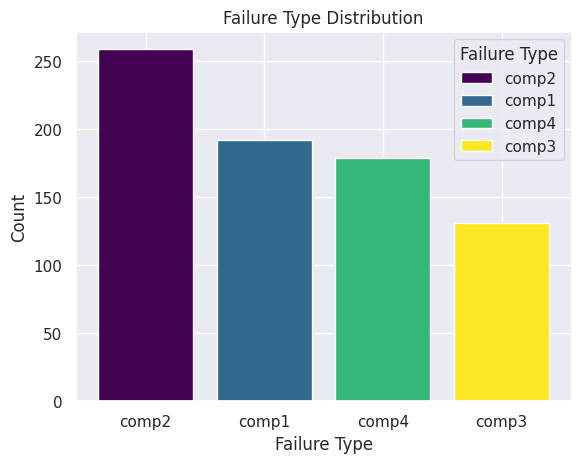

In [148]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

Displaying errors and failures for machine ID= 1

In [149]:
telemetryP = telemetry.loc[telemetry['machineID'] == 1].reset_index(drop=True)
fail1 = failures.loc[failures['machineID'] == 1]
err1 = errors.loc[errors['machineID'] == 1]

<ipython-input-150-c0e64a1595c9>:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



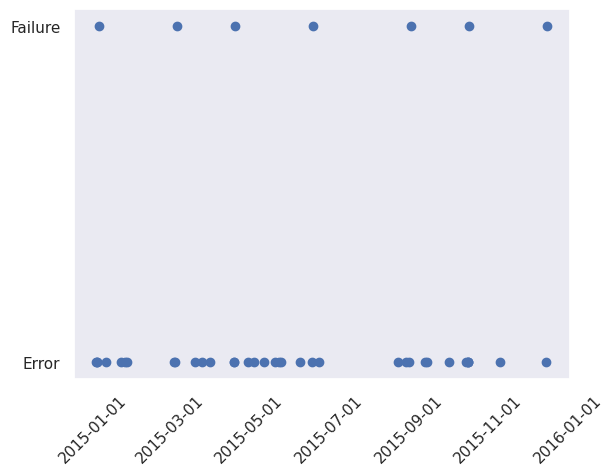

In [150]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

y_category = ['Failure'] * len(fail1) + ['Error'] * len(err1)

df_timestamp = pd.concat([fail1['datetime'], err1['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)

ax.scatter('timestamp', 'category', data=df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=45)
ax.grid()

plt.show()


**EDA on Machines**

In [151]:
len(machines.index)

100

In [152]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [153]:
machines.describe

<bound method NDFrame.describe of     machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]>

In [154]:
machines['model'] = machines['model'].astype('object')

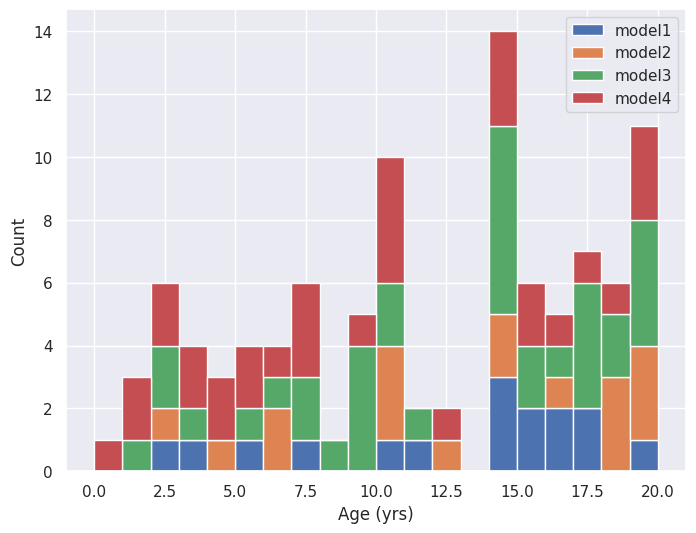

In [155]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [156]:
import plotly.express as px

fig = px.histogram(machines, x='age', color='model', barmode='stack',
                   title='Machine Age Distribution', template='plotly_dark',
                   labels={'age': 'Age', 'model': 'Model'},
                   category_orders={'model': ['model1', 'model2', 'model3', 'model4']})
fig.show()

**EDA on Maintanance**

In [157]:
len(maint)

3286

In [158]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [159]:
maint.describe

<bound method NDFrame.describe of                  datetime  machineID   comp
0     2014-06-01 06:00:00          1  comp2
1     2014-07-16 06:00:00          1  comp4
2     2014-07-31 06:00:00          1  comp3
3     2014-12-13 06:00:00          1  comp1
4     2015-01-05 06:00:00          1  comp4
...                   ...        ...    ...
3281  2015-10-10 06:00:00        100  comp3
3282  2015-10-25 06:00:00        100  comp4
3283  2015-11-09 06:00:00        100  comp4
3284  2015-12-09 06:00:00        100  comp2
3285  2015-12-24 06:00:00        100  comp2

[3286 rows x 3 columns]>

In [160]:
# Finding missing data
def get_missing_dates(datetime, start_date, end_date, freq="H"): #It returns the missing dates in datetime betweeb start and end date
  return pd.date_range(start=start_date, end=end_date, freq=freq).difference(datetime)

In [161]:
get_missing_dates(maint.datetime,
                  start_date="2014-06-01 06:00:00",
                  end_date="2016-01-01 06:00:00",
                  freq='H')

DatetimeIndex(['2014-06-01 07:00:00', '2014-06-01 08:00:00',
               '2014-06-01 09:00:00', '2014-06-01 10:00:00',
               '2014-06-01 11:00:00', '2014-06-01 12:00:00',
               '2014-06-01 13:00:00', '2014-06-01 14:00:00',
               '2014-06-01 15:00:00', '2014-06-01 16:00:00',
               ...
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00',
               '2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00'],
              dtype='datetime64[ns]', length=13523, freq=None)

Displaying number of maintanance in different components

Text(0, 0.5, 'Count')

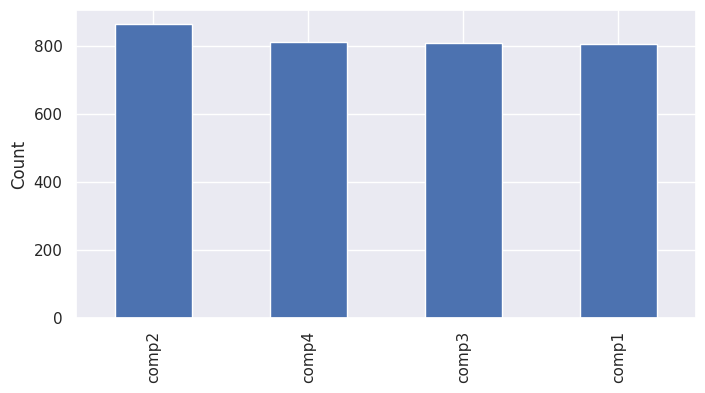

In [162]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

**EDA on Telemetry**

In [163]:
len(telemetry)

876100

In [164]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [165]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


Displaying volt for machineID = 1 between 01/01/15 to 02/01/15

Text(0, 0.5, 'voltage')

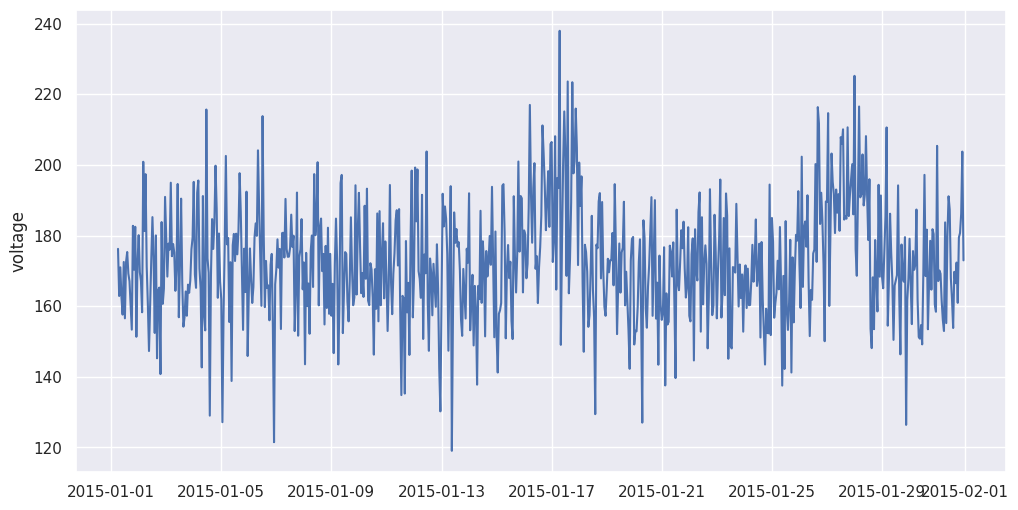

In [166]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

Text(0, 0.5, 'pressure')

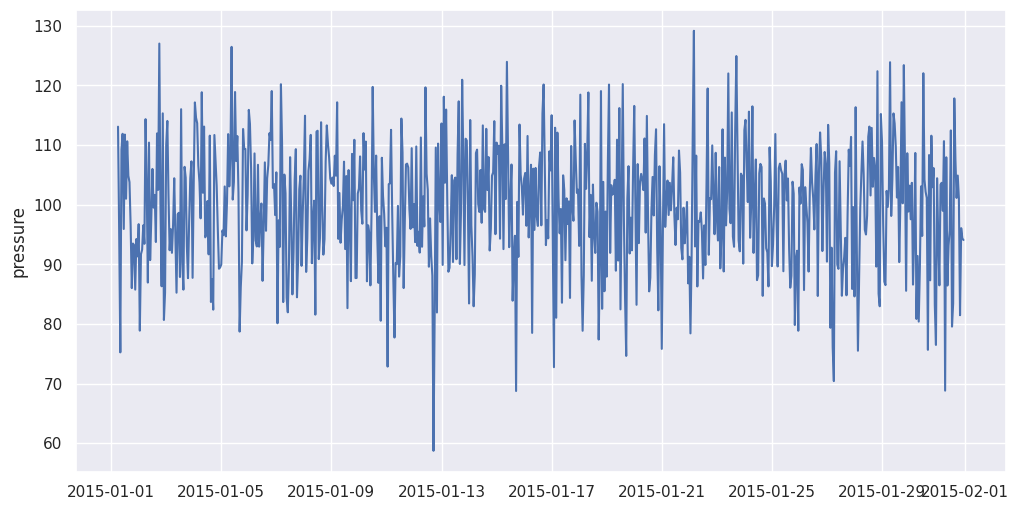

In [167]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

Text(0, 0.5, 'rotation')

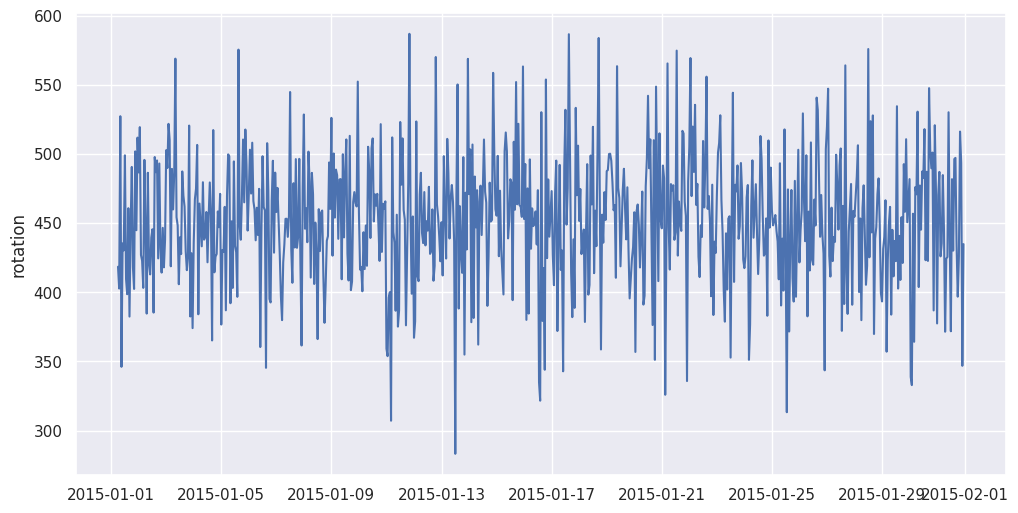

In [168]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'rotate']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['rotate'])
plt.ylabel('rotation')

Text(0, 0.5, 'vibration')

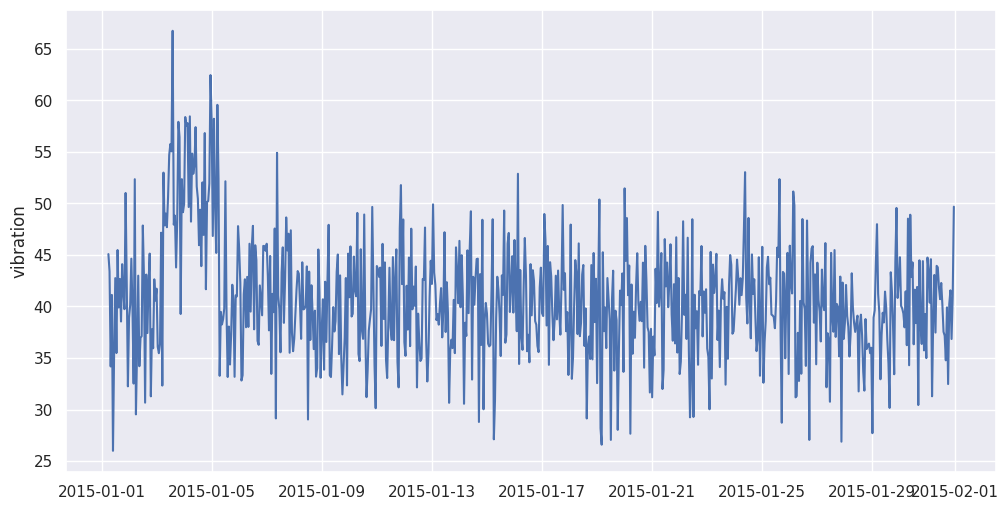

In [169]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'vibration']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['vibration'])
plt.ylabel('vibration')

In [170]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

In [171]:
machine_error_count[machine_error_count["machineID"]==23]

,machineID,errorID,error_count
108,23,error1,8
109,23,error2,9
110,23,error3,6
111,23,error4,6
112,23,error5,8


In [172]:
import plotly.express as px

fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()

#**Check Autocorellation for Machine ID = 1**#

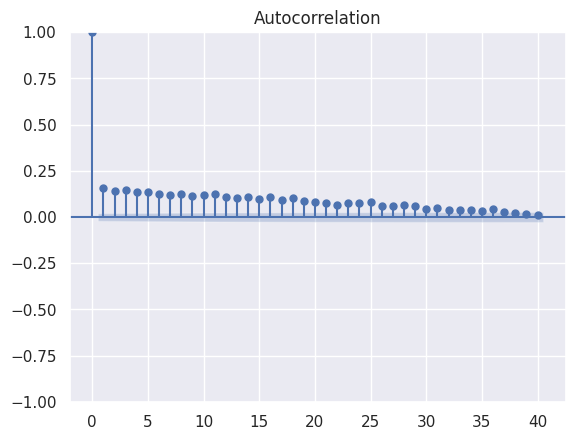

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(telemetryP['pressure'], lags = 40)
plt.show()

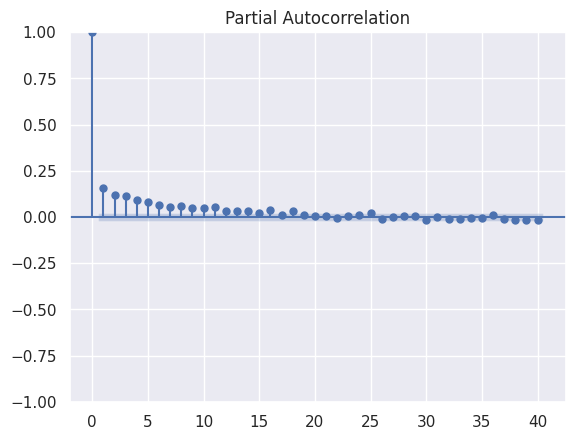

In [174]:
plot_pacf(telemetryP['pressure'], lags = 40)
plt.show()

#**Perform Feature Engineering**#

##Feature Engineering on telemetry data

In [175]:
# Calculating mean, max and min for 3H values for telemetry features
def calculate_rolling_statistics(df, col, agg_func, window=3, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_3h = pd.concat([calculate_rolling_statistics(telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_3h.columns = [f'{col}{agg}_3h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_3h.reset_index(inplace=True)
telemetry_mean_3h = telemetry_mean_3h.loc[-telemetry_mean_3h['voltmean_3h'].isnull()]

print(telemetry_mean_3h.head(10))

   machineID            datetime  voltmean_3h  voltmax_3h  voltmin_3h  \
0          1 2015-01-01 09:00:00   170.028993  176.217853  162.879223   
1          1 2015-01-01 12:00:00   164.441379  172.504839  157.610021   
2          1 2015-01-01 15:00:00   165.850875  175.324524  156.556031   
3          1 2015-01-01 18:00:00   169.468113  175.324524  160.263954   
4          1 2015-01-01 21:00:00   164.829225  182.739113  153.353492   
5          1 2015-01-02 00:00:00   171.779786  182.739113  151.335682   
6          1 2015-01-02 03:00:00   171.448865  180.097495  151.335682   
7          1 2015-01-02 06:00:00   173.520075  200.872430  158.271400   
8          1 2015-01-02 09:00:00   184.267500  200.872430  160.528861   
9          1 2015-01-02 12:00:00   158.719131  173.394523  147.300678   

   rotatemean_3h  rotatemax_3h  rotatemin_3h  pressuremean_3h  pressuremax_3h  \
0     449.533798    527.349825    402.747490        94.592122      113.077935   
1     421.885806    527.349825    

In [176]:
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,pressuremin_3h,vibrationmean_3h,vibrationmax_3h,vibrationmin_3h
0,1,2015-01-01 09:00:00,170.028993,176.217853,162.879223,449.533798,527.349825,402.747490,94.592122,113.077935,75.237905,40.893502,45.087686,34.178847
1,1,2015-01-01 12:00:00,164.441379,172.504839,157.610021,421.885806,527.349825,346.149335,99.264706,111.886648,75.237905,35.863793,43.413973,25.990511
2,1,2015-01-01 15:00:00,165.850875,175.324524,156.556031,445.681853,499.071623,398.648781,105.737146,111.886648,95.927042,38.000957,45.482287,25.990511
3,1,2015-01-01 18:00:00,169.468113,175.324524,160.263954,422.502848,460.850670,382.483543,104.537422,110.624361,96.480976,41.116341,45.482287,35.482009
4,1,2015-01-01 21:00:00,164.829225,182.739113,153.353492,443.281168,490.672921,382.483543,92.776181,103.780663,86.012440,41.618121,44.108554,38.543681


In [177]:
## Calculating mean, max and min for 24H values for telemetry features

def calculate_rolling_statistics(df, col, agg_func, window=24, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_24h = pd.concat([calculate_rolling_statistics(telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_24h.columns = [f'{col}{agg}_24h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

print(telemetry_mean_24h.head(10))

    machineID            datetime  voltmean_24h  voltmax_24h  voltmin_24h  \
7           1 2015-01-02 06:00:00    169.733809   200.872430   151.335682   
8           1 2015-01-02 09:00:00    170.700727   200.872430   151.335682   
9           1 2015-01-02 12:00:00    169.985446   200.872430   147.300678   
10          1 2015-01-02 15:00:00    170.960571   200.872430   147.300678   
11          1 2015-01-02 18:00:00    170.245587   200.872430   145.248486   
12          1 2015-01-02 21:00:00    169.578060   200.872430   140.776309   
13          1 2015-01-03 00:00:00    169.095238   200.872430   140.776309   
14          1 2015-01-03 03:00:00    169.885627   200.872430   140.776309   
15          1 2015-01-03 06:00:00    170.636975   200.872430   140.776309   
16          1 2015-01-03 09:00:00    169.697564   194.942847   140.776309   

    rotatemean_24h  rotatemax_24h  rotatemin_24h  pressuremean_24h  \
7       445.179865     527.349825     346.149335         96.797113   
8       445.

In [178]:
telemetry_mean_24h.head(5)

,machineID,datetime,voltmean_24h,voltmax_24h,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
7,1,2015-01-02 06:00:00,169.733809,200.87243,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
8,1,2015-01-02 09:00:00,170.700727,200.87243,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
9,1,2015-01-02 12:00:00,169.985446,200.87243,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
10,1,2015-01-02 15:00:00,170.960571,200.87243,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
11,1,2015-01-02 18:00:00,170.245587,200.87243,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [179]:
# Merging telemetry_mean_3h and telemetry_mean_24h into telemetry
telemetry_features = telemetry.merge(telemetry_mean_3h, on=['datetime', 'machineID'], how='left')\
                              .merge(telemetry_mean_24h, on=['datetime', 'machineID'], how='left')\
                              .dropna()

telemetry_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,...,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
24,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,173.520075,200.872430,158.271400,438.248596,...,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
27,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,184.267500,200.872430,160.528861,443.486076,...,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
30,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,158.719131,173.394523,147.300678,431.656367,...,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
33,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,173.651877,185.205355,152.420775,433.054936,...,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
36,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,163.748237,180.030715,145.248486,473.001386,...,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
#making sure that there are no null values
telemetry_features.isna().sum()

## Feature Engineer on Errors dataset

In [181]:
# Creating dummy variables for each errors
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.head()

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0


In [182]:
# renaming the columns
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [183]:
error_count.head(10)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [184]:
# Merging the errors to telemetry using datetime and machineID and filling blank with zeros
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)

In [185]:
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876403.000000,876403.000000,876403.000000,876403.000000,876403.00000,876403.000000
mean,50.499881,0.001152,0.001127,0.000956,0.00083,0.000406
std,28.866464,0.033928,0.033557,0.030907,0.02879,0.020150
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,76.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [186]:
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [187]:
# Calculating rolling sum for error type (error1 to error5) over 24h then resampling time seriew at 3H frequency
fields = ['error%d' % i for i in range(1, 6)]

temp = [
    pd.pivot_table(error_count, index=pd.to_datetime(error_count['datetime']), columns='machineID', values=col)
    .resample('3H', closed='left', label='right').first().unstack()
    .rolling(window=24, center=False).sum()
    for col in fields if col in error_count.columns
]

error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,0.037483,0.029266,0.025117,0.025541,0.018666
std,28.863914,0.192195,0.154875,0.140627,0.158549,0.134294
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2.000000,2.000000,1.500000,3.000000,2.000000


In [188]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00    NaN
            2015-01-01 12:00:00    NaN
            2015-01-01 15:00:00    NaN
            2015-01-01 18:00:00    NaN
            2015-01-01 21:00:00    NaN
                                  ... 
 100        2015-12-31 21:00:00    0.0
            2016-01-01 00:00:00    0.0
            2016-01-01 03:00:00    0.0
            2016-01-01 06:00:00    0.0
            2016-01-01 09:00:00    0.0
 Length: 292100, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00    NaN
            2015-01-01 12:00:00    NaN
            2015-01-01 15:00:00    NaN
            2015-01-01 18:00:00    NaN
            2015-01-01 21:00:00    NaN
                                  ... 
 100        2015-12-31 21:00:00    0.0
            2016-01-01 00:00:00    0.0
            2016-01-01 03:00:00    0.0
            2016-01-01 06:00:00    0.0
            2016-01-01 09:00:00    0.0
 Length: 292100, dtype: float64,
 machineID  

In [189]:
error_count.head(10)

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0
28,1,2015-01-04 21:00:00,0.0,0.0,0.0,0.0,1.0
29,1,2015-01-05 00:00:00,0.0,0.0,0.0,0.0,1.0
30,1,2015-01-05 03:00:00,0.0,0.0,0.0,0.0,1.0
31,1,2015-01-05 06:00:00,0.0,0.0,0.0,0.0,1.0
32,1,2015-01-05 09:00:00,0.0,0.0,0.0,0.0,1.0


In [190]:
# Merging error_count into telemetry_features
telemetry_errors_features = telemetry_features.merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)

In [191]:
telemetry_errors_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,...,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h,error1count,error2count,error3count,error4count,error5count
0,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,173.520075,200.872430,158.271400,438.248596,...,113.077935,75.237905,40.385160,52.355876,25.990511,0.0,0.0,0.0,0.0,0.0
1,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,184.267500,200.872430,160.528861,443.486076,...,114.342061,75.237905,39.647643,52.355876,25.990511,0.0,0.0,0.0,0.0,0.0
2,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,158.719131,173.394523,147.300678,431.656367,...,114.342061,78.880780,39.823493,52.355876,25.990511,0.0,0.0,0.0,0.0,0.0
3,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,173.651877,185.205355,152.420775,433.054936,...,114.342061,78.880780,40.230225,52.355876,29.527665,0.0,0.0,0.0,0.0,0.0
4,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,163.748237,180.030715,145.248486,473.001386,...,114.342061,78.880780,39.960667,52.355876,29.527665,0.0,0.0,0.0,0.0,0.0


###Feature Engineering on Maint Dataset

In [192]:
maint.head(5)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [193]:
# Create a column for each component type

maint['datetime'] = pd.to_datetime(maint['datetime']) # to datetime
maintenance_features = pd.get_dummies(maint.set_index('datetime')).reset_index()
maintenance_features.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Combine repairs for a given machine in a given hour
maintenance_features = maintenance_features.groupby(['machineID', 'datetime']).sum().reset_index()

telemetry['datetime'] = pd.to_datetime(telemetry['datetime']) # to datetime

# Add timepoints where no components were replaced
maintenance_features = telemetry[['datetime', 'machineID']].merge(maintenance_features,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # Convert indicator to most recent date of component change
    maintenance_features.loc[maintenance_features[comp] < 1, comp] = None
    maintenance_features.loc[-maintenance_features[comp].isnull(), comp] = maintenance_features.loc[-maintenance_features[comp].isnull(), 'datetime']

    # Forward-fill the most-recent date of component change
    maintenance_features[comp] = maintenance_features[comp].fillna(method='ffill')

# Remove dates in 2014 (may have NaN or future component change dates)
maintenance_features = maintenance_features.loc[maintenance_features['datetime'] > pd.to_datetime('2015-01-01')]

# Replace dates of most recent component change with hours since the previous maintenance
for comp in components:
    maintenance_features[comp] = (maintenance_features['datetime'] - maintenance_features[comp]).dt.total_seconds() / 3600.0

# Rename the columns
new_columns = {f'{comp}': f'hapm_{comp}' for comp in components}
maintenance_features.rename(columns=new_columns, inplace=True)

maintenance_features.describe()




<ipython-input-193-7c3fba400e7d>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-193-7c3fba400e7d>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,1284.604452,1236.979340,1265.423080,1292.020591
std,28.866087,1499.800290,1422.462106,1412.954744,1432.991482
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,319.000000,291.000000,315.000000,312.000000
50%,50.500000,787.000000,712.000000,775.000000,780.000000
75%,75.250000,1649.000000,1597.000000,1616.000000,1691.000000
max,100.000000,11807.000000,8375.000000,8903.000000,9479.000000


In [194]:
maintenance_features.head()

,datetime,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
0,2015-01-01 06:00:00,1,456.0,5136.0,3696.0,4056.0
1,2015-01-01 07:00:00,1,457.0,5137.0,3697.0,4057.0
2,2015-01-01 08:00:00,1,458.0,5138.0,3698.0,4058.0
3,2015-01-01 09:00:00,1,459.0,5139.0,3699.0,4059.0
4,2015-01-01 10:00:00,1,460.0,5140.0,3700.0,4060.0


In [195]:
maintenance_features.isna().sum()

datetime      0
machineID     0
hapm_comp1    0
hapm_comp2    0
hapm_comp3    0
hapm_comp4    0
dtype: int64

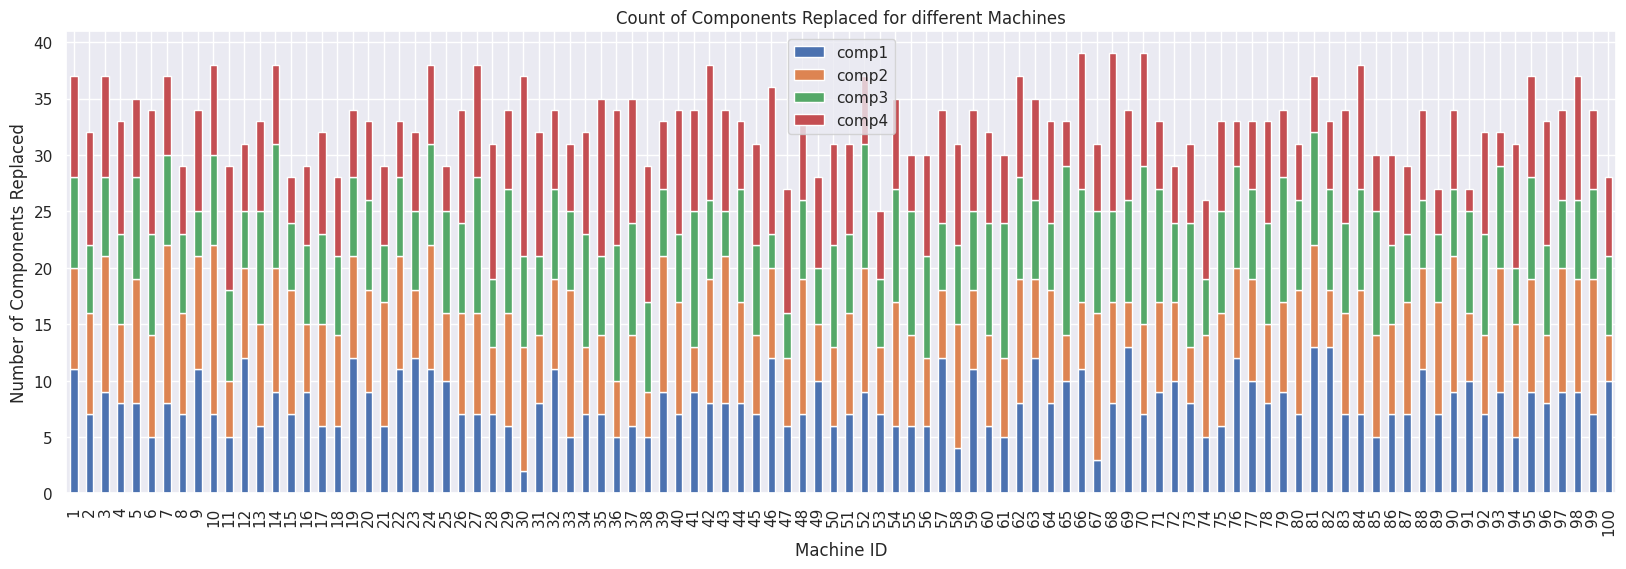

In [196]:
#shows how the machine to different component replaced looks like
maintenance= maint.groupby(["machineID", "comp"]).size().reset_index()
maintenance.columns = ["machineID", "comp", "num_comp"]
maintenance_pivot = pd.pivot(maintenance, index="machineID", columns="comp", values="num_comp").rename_axis(None, axis=1)

maintenance_pivot.plot.bar(stacked=True, figsize=(20, 6), title="Count of Components Replaced for different Machines")
plt.xlabel("Machine ID")
plt.ylabel("Number of Components Replaced")
plt.show()

### Adding Machines into dataset

In [197]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [198]:
# Merge maintenance_features and machines into telemetry_errors_features
final_features = telemetry_errors_features.merge(maintenance_features, on=['datetime', 'machineID'], how='left') \
                           .merge(machines, on=['machineID'], how='left')
print(final_features.head())
final_features.describe()


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-02 06:00:00          1  197.363125  446.943947  114.342061   
1 2015-01-02 09:00:00          1  147.300678  420.610792  110.408985   
2 2015-01-02 12:00:00          1  185.205355  445.606447  105.993247   
3 2015-01-02 15:00:00          1  180.030715  486.893593   93.743827   
4 2015-01-02 18:00:00          1  165.258225  493.161428  127.014498   

   vibration  voltmean_3h  voltmax_3h  voltmin_3h  rotatemean_3h  ...  \
0  29.527665   173.520075  200.872430  158.271400     438.248596  ...   
1  34.203042   184.267500  200.872430  160.528861     443.486076  ...   
2  47.862484   158.719131  173.394523  147.300678     431.656367  ...   
3  43.099758   173.651877  185.205355  152.420775     433.054936  ...   
4  45.135194   163.748237  180.030715  145.248486     473.001386  ...   

   error2count  error3count  error4count  error5count  hapm_comp1  hapm_comp2  \
0          0.0          0.0          0.0       

,machineID,volt,rotate,pressure,vibration,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,...,error1count,error2count,error3count,error4count,error5count,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,...,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.731612,446.632779,100.870518,40.381530,170.771519,188.256229,153.308173,446.613743,504.977819,...,0.037412,0.029300,0.025118,0.025530,0.018689,1280.417961,1231.655118,1260.290587,1286.858826,11.330000
std,28.86612,15.493752,52.670770,11.062889,5.372946,8.233786,10.812471,10.718369,29.092501,37.052949,...,0.192028,0.154939,0.140588,0.158519,0.134371,1498.033522,1419.377832,1410.381699,1430.565253,5.827625
min,1.00000,100.194137,160.258190,51.237106,14.877054,136.268613,144.061109,97.333604,208.917145,259.715042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,160.284450,412.364603,93.496579,36.772325,165.338016,180.765730,146.486938,431.047991,482.017792,...,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,288.000000,312.000000,309.000000,6.750000
50%,50.50000,170.562403,447.659860,100.409887,40.241911,170.360423,187.434587,153.489787,448.599068,504.943028,...,0.000000,0.000000,0.000000,0.000000,0.000000,783.000000,708.000000,771.000000,777.000000,12.000000
75%,75.25000,180.956092,482.192938,107.573478,43.788590,175.608980,194.813036,160.248882,465.415803,528.364553,...,0.000000,0.000000,0.000000,0.000000,0.000000,1644.000000,1590.000000,1608.000000,1683.000000,16.000000
max,100.00000,247.060615,683.490188,185.951998,71.182495,230.132990,255.124717,220.632286,567.470816,695.020984,...,2.000000,2.000000,1.500000,3.000000,2.000000,11805.000000,8373.000000,8901.000000,9477.000000,20.000000


In [199]:
count=final_features.columns.value_counts()
count.count()

41

###Feature Engeneering on Failures

In [200]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [238]:
failures.value_counts()

datetime             machineID  failure
2015-01-02 03:00:00  16         comp1      1
2015-08-28 06:00:00  98         comp2      1
2015-08-20 06:00:00  75         comp2      1
2015-08-21 06:00:00  89         comp2      1
                     94         comp4      1
                                          ..
2015-04-20 06:00:00  11         comp3      1
                     69         comp4      1
                     92         comp1      1
                                comp2      1
2015-12-31 06:00:00  95         comp1      1
Length: 761, dtype: int64

In [201]:
# Merging failulures into final_features
labeled_features = final_features.merge(failures, on=['datetime', 'machineID'], how='left')

# Filling missing values using backward fill (bfill) with a limit of 7
labeled_features.fillna(method='bfill', limit=7, inplace=True)

# Filling remaining missing values with 'none'
labeled_features.fillna('none', inplace=True)

In [202]:
labeled_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,...,error3count,error4count,error5count,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,model,age,failure
0,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,173.520075,200.872430,158.271400,438.248596,...,0.0,0.0,0.0,480.0,5160.0,3720.0,4080.0,model3,18,none
1,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,184.267500,200.872430,160.528861,443.486076,...,0.0,0.0,0.0,483.0,5163.0,3723.0,4083.0,model3,18,none
2,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,158.719131,173.394523,147.300678,431.656367,...,0.0,0.0,0.0,486.0,5166.0,3726.0,4086.0,model3,18,none
3,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,173.651877,185.205355,152.420775,433.054936,...,0.0,0.0,0.0,489.0,5169.0,3729.0,4089.0,model3,18,none
4,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,163.748237,180.030715,145.248486,473.001386,...,0.0,0.0,0.0,492.0,5172.0,3732.0,4092.0,model3,18,none


In [203]:
labeled_features.shape

(291341, 42)

###**APPLY MODELS**

## Applying GradientBoost

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    y_train = train_data['failure']
    X_train = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))
    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    X_test = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))
    y_test = test_data['failure']
    print('Training on %s to %s' % (last_train_date, first_test_date))

Training on 2015-07-31 01:00:00 to 2015-08-01 01:00:00
Training on 2015-08-31 01:00:00 to 2015-09-01 01:00:00
Training on 2015-09-30 01:00:00 to 2015-10-01 01:00:00


In [254]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [208]:
# Training the model and making predictions

from sklearn.ensemble import GradientBoostingClassifier

my_model = GradientBoostingClassifier(random_state=42)
my_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [255]:
y_predict = my_model.predict(X_test)

In [256]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9907463859420937


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,288,2,1,1,28
comp2,0,546,1,2,7
comp3,0,0,200,4,20
comp4,1,0,1,277,1
none,163,225,46,180,71815


###APPLYING RANDOM FOREST

In [263]:
from sklearn.ensemble import RandomForestClassifier

# make test and training splits
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    y_train = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    X_train = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    X_test = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
    # train and predict using the model, storing results for later
    my_model = RandomForestClassifier(n_estimators=100, random_state=42)
    my_model.fit(X_train, y_train)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(X_test)
    test_results.append(test_result)
    models.append(my_model)

<ipython-input-263-b83d20076def>:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-263-b83d20076def>:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-263-b83d20076def>:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-263-b83d20076def>:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-263-b83d20076def>:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-263-b83d20076def>:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'label

In [265]:
y_predict = my_model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)


0.9985774092590335


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,271,2,0,3,44
comp2,0,545,0,0,11
comp3,1,0,200,3,20
comp4,1,3,0,270,6
none,0,0,1,10,72418


In [269]:
test_results = []
models = []

for last_train_date, first_test_date in threshold_dates:
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result = my_model.predict(X_test)
    test_results.append(test_result)
    models.append(my_model)

In [270]:
# Testing the model

from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test data
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []

    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)

    # Calculate accuracy score
    accuracy = accuracy_score(actual, predicted)
    output.extend([[accuracy] * len(labels)])
    output_labels.extend(['accuracy'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels

    return output_df

In [271]:
evaluation_results = []

for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i + 1))
    evaluation_result = Evaluate(
        actual=test_result['failure'],
        predicted=test_result['predicted_failure'],
        labels=['none', 'comp1', 'comp2', 'comp3', 'comp4']
    )
    evaluation_results.append(evaluation_result)

evaluation_results[0]


Split 1:


IndexError: ignored

###APPLYING ANN MODEL

In [272]:
# Applying OneHotEncoder for model and failuler for models
labeled_features_temp = pd.get_dummies(labeled_features[['model', 'failure', 'datetime', 'machineID']].set_index('datetime')).reset_index()

In [273]:
labeled_features_temp.head()

,datetime,machineID,model_model1,model_model2,model_model3,model_model4,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,2015-01-02 06:00:00,1,0,0,1,0,0,0,0,0,1
1,2015-01-02 09:00:00,1,0,0,1,0,0,0,0,0,1
2,2015-01-02 12:00:00,1,0,0,1,0,0,0,0,0,1
3,2015-01-02 15:00:00,1,0,0,1,0,0,0,0,0,1
4,2015-01-02 18:00:00,1,0,0,1,0,0,0,0,0,1


In [274]:
labeled_features_final = labeled_features.merge(labeled_features_temp, on=['datetime', 'machineID'], how='left').fillna(0.0)

In [275]:
labeled_features_final.drop(['model','failure'], axis= 1, inplace= True)

In [276]:
labeled_features_final.shape

(291423, 49)

In [277]:
import tensorflow as tf

In [290]:
labeled_features_ann = labeled_features.merge(labeled_features_temp, on=['datetime', 'machineID'], how='left')

# Filling remaining missing values with 'none'
labeled_features_ann.fillna('none', inplace=True)

# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features_ann[labeled_features_ann['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features_ann[(labeled_features_ann['datetime'] > first_test_date) & (labeled_features_ann['datetime'] < first_test_date + pd.DateOffset(days=1))]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))

In [291]:
from sklearn.preprocessing import LabelEncoder
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(test_X)

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)

In [292]:
# Training model with ANN
ann = tf.keras.models.Sequential()

In [293]:
# Build the neural network model
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=9, activation='softmax'))

In [295]:
# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [296]:
# Train the model
ann.fit(X_train, train_y, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/5
6098/6098 - 18s - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0017 - val_accuracy: 0.9996 - 18s/epoch - 3ms/step
Epoch 2/5
6098/6098 - 12s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9996 - 12s/epoch - 2ms/step
Epoch 3/5
6098/6098 - 15s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9996 - 15s/epoch - 3ms/step
Epoch 4/5
6098/6098 - 12s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9996 - 12s/epoch - 2ms/step
Epoch 5/5
6098/6098 - 14s - loss: 9.9385e-04 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9996 - 14s/epoch - 2ms/step


In [298]:
# Testing the model
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit the LabelEncoder on the training data
label_encoder = LabelEncoder()
label_encoder.fit(train_data['failure'])

# Label encode the target variable for testing
test_y_encoded = label_encoder.transform(test_data['failure'])

# Make predictions on the test data using the trained model
predicted_probabilities = ann.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Inverse transform label-encoded actual failure labels
actual_labels = label_encoder.inverse_transform(test_y_encoded)

# Convert predicted labels to the same data type as actual labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Calculate and display confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
print('Confusion matrix:\n', cm)

# Calculate accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)
print('Accuracy Score:', accuracy)



25/25 [==============================] - 0s 2ms/step
Confusion matrix:
 [[ 14   0   0   0   0]
 [  0   8   0   0   0]
 [  0   0  12   0   0]
 [  0   0   0   2   0]
 [  0   0   0   0 764]]
Accuracy Score: 1.0


In [299]:
pip install imblearn


In [231]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [233]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [234]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'none': 212475, 'comp2': 1423, 'comp1': 1138, 'comp4': 954, 'comp3': 742})
After SMOTE : Counter({'none': 212475, 'comp4': 212475, 'comp1': 212475, 'comp2': 212475, 'comp3': 212475})


In [235]:
rf_classifier.fit(X_train_smote,y_train_smote)
y_predict = rf_classifier.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9963554580064762


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,275,0,0,16,29
comp2,1,527,0,1,27
comp3,1,0,202,8,13
comp4,0,0,0,275,5
none,72,51,6,39,72261
